In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [2]:
cpu_memory_bandwidth = (2200*2)*2*4*1e6 # CPU MHz*2 * 2 bytes width * 4 channels
cpu_memory_bandwidth # 35.2 GB/s

35200000000.0

In [3]:
cpu_peak_performance = (2200*2)*2*2*1e6 # CPU MHz * 2(processors) * 2(mul,add) * 2(SIMD double precision) * 1 physical core
cpu_peak_performance

17600000000.0

In [4]:
!pip install thop
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from torchvision.models.shufflenetv2 import shufflenet_v2_x1_0
import torchvision
from thop import profile
from thop import clever_format
effnetb4 = torchvision.models.efficientnet_b4()
resnet18 = torchvision.models.resnet18()
densenet121 = torchvision.models.densenet121()
shufflenetv2_x0_5 = torchvision.models.shufflenet_v2_x0_5()
mobilenetv2 = torchvision.models.mobilenet_v2()
shufflenetv2_x2_0 = torchvision.models.shufflenet_v2_x2_0()
squeezenet = torchvision.models.squeezenet1_1()
effnetb0 = torchvision.models.efficientnet_b0()
effnetb1 = torchvision.models.efficientnet_b1()
effnetb2 = torchvision.models.efficientnet_b2()
mobilenetv3 = torchvision.models.mobilenet_v3_small()

model_names = ['effnetb4','resnet_18', 'shufflenetv2_x0_5', 'mobilenetv2', 'shufflenetv2_x2_0', 'squeezenet1_1', 'effnetb0', 'effnetb1', 'effnetb2', 'mobilenetv3_small']
models = [effnetb4, resnet18, shufflenetv2_x0_5, mobilenetv2, shufflenetv2_x2_0, squeezenet, effnetb0, effnetb1, effnetb2, mobilenetv3]
macs_models = []
params_models = []
macs_models_str = []
params_models_str = []
input = torch.randn(1, 3, 224, 224)

for m in models:
  print(model_names[models.index(m)])
  macs, params = profile(m, inputs=(input, ))
  macs_models.append(macs)
  params_models.append(params)
  macs, params = clever_format([macs, params], "%.3f")
  macs_models_str.append(macs)
  params_models_str.append(params)

print(model_names)
print(macs_models_str)
print(params_models_str)
print(macs_models)
print(params_models)

effnetb4
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
resnet_18
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPoo

In [6]:
flops_models = [i*2 for i in macs_models]
print(flops_models)

[3157217904.0, 3648067584.0, 89144128.0, 654973440.0, 1196458864.0, 698643872.0, 830290048.0, 1221229728.0, 1403852736.0, 124955888.0]


In [7]:
giga_flops_models = [i / 1e9 for i in flops_models]

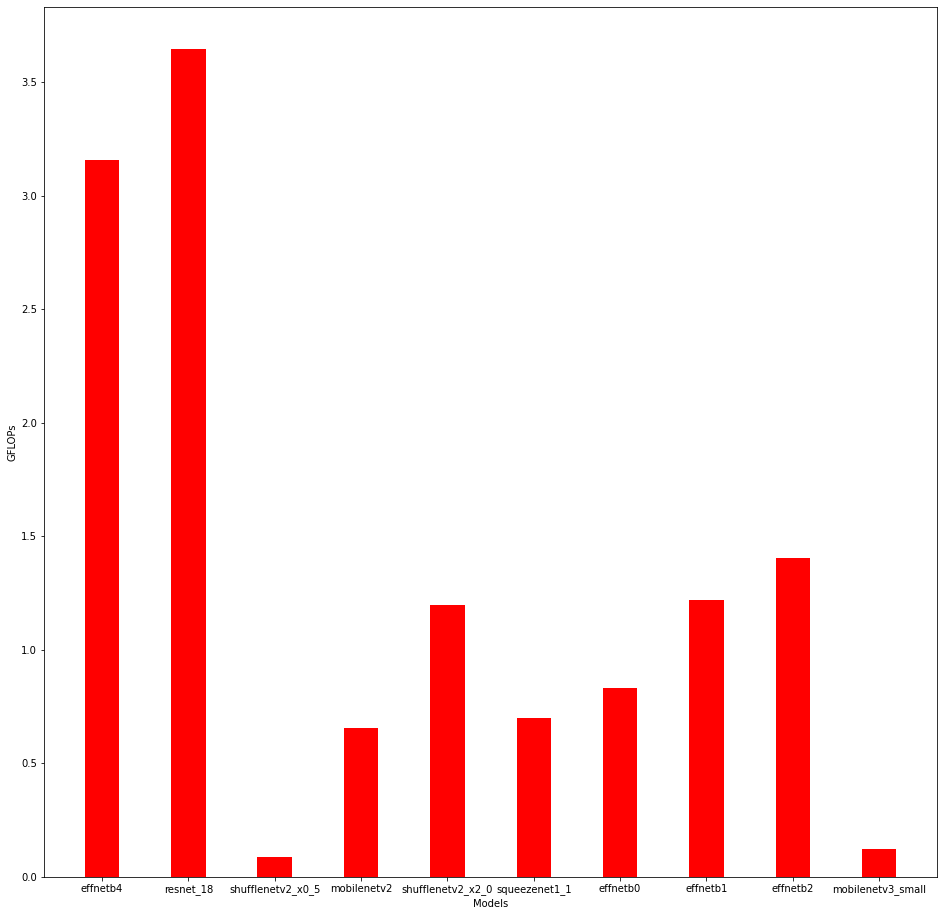

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,16))
plt.bar(model_names, giga_flops_models, color='r', width=0.4, align='center')
plt.xlabel('Models')
plt.ylabel('GFLOPs')
fig.savefig('Model_FLOPS.png')
plt.show()

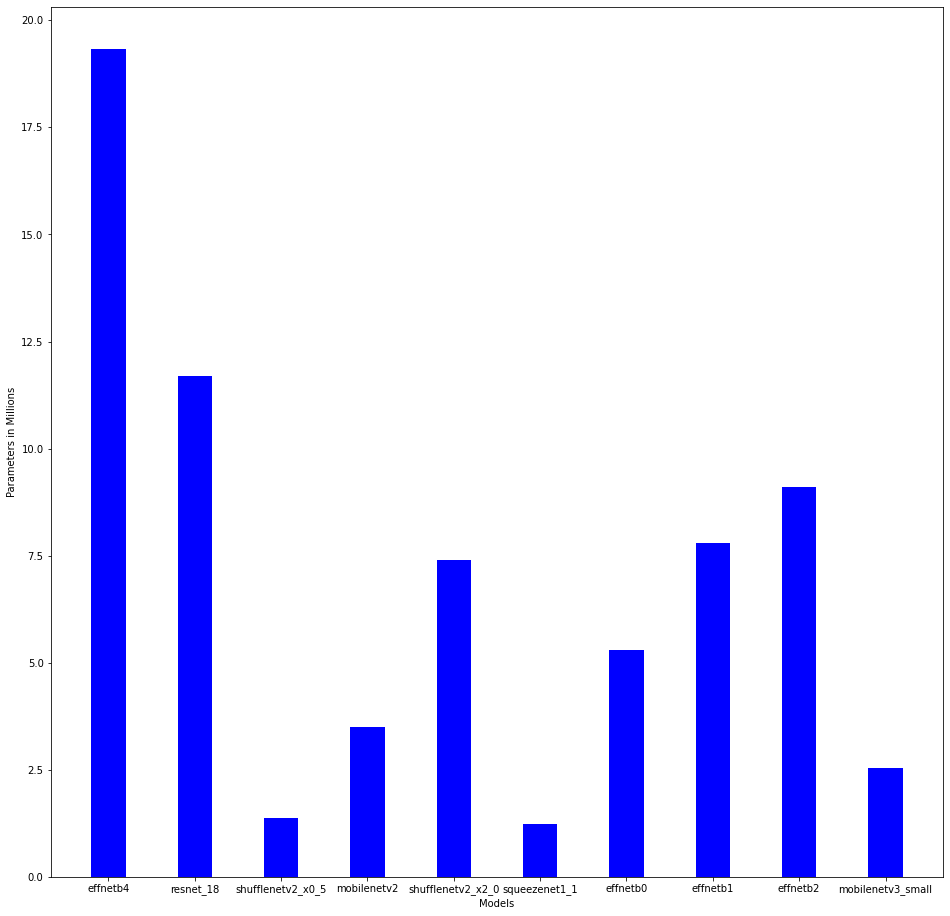

In [9]:
params_models_millions = [i / 1e6 for i in params_models]
fig = plt.figure(figsize = (16,16))

plt.bar(model_names, params_models_millions, width=0.4, color='b', align='center')
plt.xlabel('Models')
plt.ylabel('Parameters in Millions')
fig.savefig('Model_params.png')
plt.show()

In [26]:
from torchsummary import summary
summary(effnetb4, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 48, 112, 112]           1,296
       BatchNorm2d-2         [-1, 48, 112, 112]              96
              SiLU-3         [-1, 48, 112, 112]               0
            Conv2d-4         [-1, 48, 112, 112]             432
       BatchNorm2d-5         [-1, 48, 112, 112]              96
              SiLU-6         [-1, 48, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 48, 1, 1]               0
            Conv2d-8             [-1, 12, 1, 1]             588
              SiLU-9             [-1, 12, 1, 1]               0
           Conv2d-10             [-1, 48, 1, 1]             624
          Sigmoid-11             [-1, 48, 1, 1]               0
SqueezeExcitation-12         [-1, 48, 112, 112]               0
           Conv2d-13         [-1, 24, 112, 112]           1,152
      BatchNorm2d-14         [-1, 24, 1

In [30]:
summary(resnet18, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [31]:
summary(shufflenetv2_x0_5, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 112, 112]             648
       BatchNorm2d-2         [-1, 24, 112, 112]              48
              ReLU-3         [-1, 24, 112, 112]               0
         MaxPool2d-4           [-1, 24, 56, 56]               0
            Conv2d-5           [-1, 24, 28, 28]             216
       BatchNorm2d-6           [-1, 24, 28, 28]              48
            Conv2d-7           [-1, 24, 28, 28]             576
       BatchNorm2d-8           [-1, 24, 28, 28]              48
              ReLU-9           [-1, 24, 28, 28]               0
           Conv2d-10           [-1, 24, 56, 56]             576
      BatchNorm2d-11           [-1, 24, 56, 56]              48
             ReLU-12           [-1, 24, 56, 56]               0
           Conv2d-13           [-1, 24, 28, 28]             216
      BatchNorm2d-14           [-1, 24,

In [32]:
summary(mobilenetv2, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [33]:
summary(shufflenetv2_x2_0, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 112, 112]             648
       BatchNorm2d-2         [-1, 24, 112, 112]              48
              ReLU-3         [-1, 24, 112, 112]               0
         MaxPool2d-4           [-1, 24, 56, 56]               0
            Conv2d-5           [-1, 24, 28, 28]             216
       BatchNorm2d-6           [-1, 24, 28, 28]              48
            Conv2d-7          [-1, 122, 28, 28]           2,928
       BatchNorm2d-8          [-1, 122, 28, 28]             244
              ReLU-9          [-1, 122, 28, 28]               0
           Conv2d-10          [-1, 122, 56, 56]           2,928
      BatchNorm2d-11          [-1, 122, 56, 56]             244
             ReLU-12          [-1, 122, 56, 56]               0
           Conv2d-13          [-1, 122, 28, 28]           1,098
      BatchNorm2d-14          [-1, 122,

In [34]:
summary(squeezenet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 111, 111]           1,792
              ReLU-2         [-1, 64, 111, 111]               0
         MaxPool2d-3           [-1, 64, 55, 55]               0
            Conv2d-4           [-1, 16, 55, 55]           1,040
              ReLU-5           [-1, 16, 55, 55]               0
            Conv2d-6           [-1, 64, 55, 55]           1,088
              ReLU-7           [-1, 64, 55, 55]               0
            Conv2d-8           [-1, 64, 55, 55]           9,280
              ReLU-9           [-1, 64, 55, 55]               0
             Fire-10          [-1, 128, 55, 55]               0
           Conv2d-11           [-1, 16, 55, 55]           2,064
             ReLU-12           [-1, 16, 55, 55]               0
           Conv2d-13           [-1, 64, 55, 55]           1,088
             ReLU-14           [-1, 64,

In [35]:
summary(effnetb0, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [36]:
summary(effnetb1, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [37]:
summary(effnetb2, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [38]:
summary(mobilenetv3, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4           [-1, 16, 56, 56]             144
       BatchNorm2d-5           [-1, 16, 56, 56]              32
              ReLU-6           [-1, 16, 56, 56]               0
 AdaptiveAvgPool2d-7             [-1, 16, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             136
              ReLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 16, 1, 1]             144
      Hardsigmoid-11             [-1, 16, 1, 1]               0
SqueezeExcitation-12           [-1, 16, 56, 56]               0
           Conv2d-13           [-1, 16, 56, 56]             256
      BatchNorm2d-14           [-1, 16,

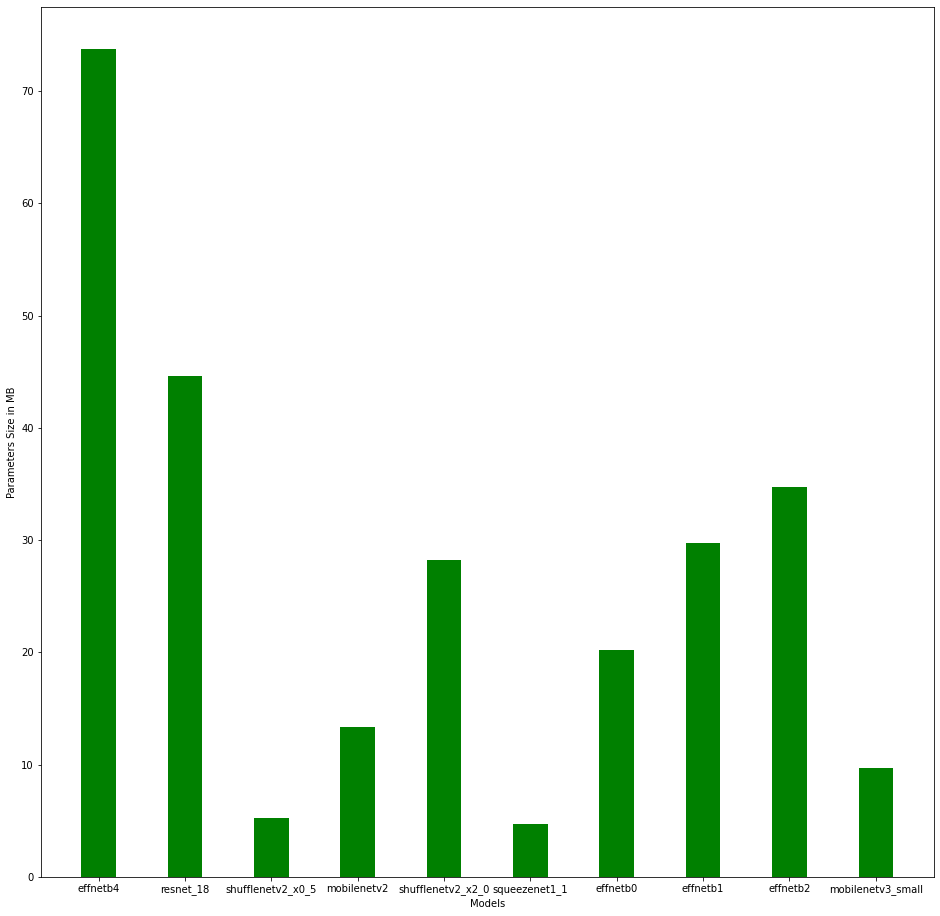

In [10]:
memory_footprint = [73.78,44.59,5.21,13.31,28.21,4.71,20.17,29.73,34.75,9.7] # Parameter size in MB
fig = plt.figure(figsize=(16,16))
plt.bar(model_names, memory_footprint, align='center', width=0.4, color='g')
plt.xlabel('Models')
plt.ylabel('Parameters Size in MB')
fig.savefig('Model_footprint_in_MB.png')
plt.show()

In [11]:
op_intensity = []
execution_memory = [524.27,107.96,30.85,166.81,120.93,59.05,194.4,275.75,292.76,44.88] #in MB
for i in range(len(models)):
  op_intensity.append(flops_models[i]/(execution_memory[i]*1e6))
print(op_intensity)

[6.022122005836687, 33.79091871063357, 2.8895989627228524, 3.9264638810622863, 9.893813478872074, 11.831394953429298, 4.271039341563786, 4.42875694650952, 4.7952341030195385, 2.784222103386809]


In [12]:
colors = ['blue', 'green', 'red', 'orange', 'yellow', 'pink', 'purple', 'gray', 'gold', 'brown']

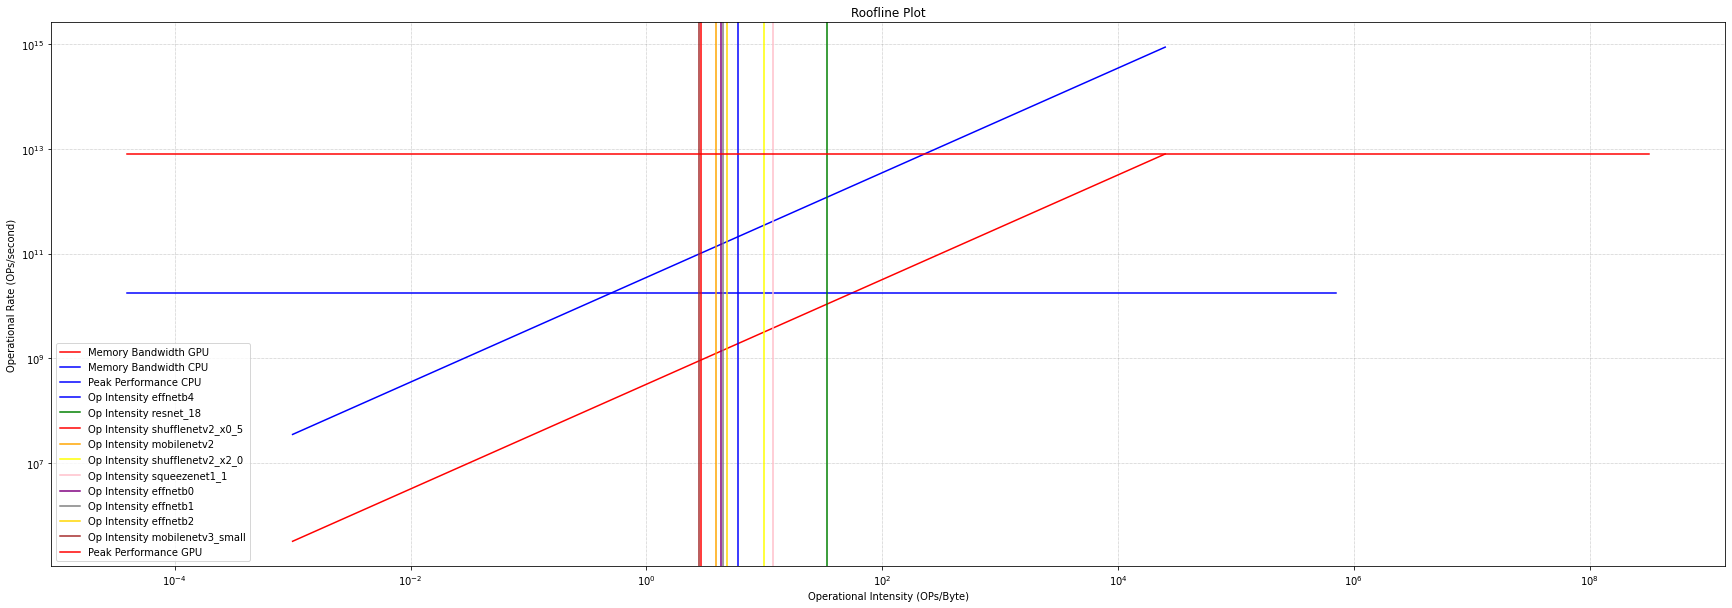

In [13]:
import numpy as np
import matplotlib.pyplot as plt

peak_performance_t4_gpu = 8.1*10**12  # Peak performance of NVIDIA T4 GPU
peak_performance_cpu = cpu_peak_performance #72.64*10**9 # Peak performance of 2x Intel Xeon processor CPU
mem_bandwidth_cpu = cpu_memory_bandwidth #94*10**9 # CPU
mem_bandwidth_gpu = 320*10**6 # GPU



ops_per_byte_cpu = np.logspace(-3, 4.4, num=100)
ops_per_byte_gpu = np.logspace(-3, 4.4, num=100)
ops_per_sec_gpu = np.zeros_like(ops_per_byte_gpu)
ops_per_sec_cpu = np.zeros_like(ops_per_byte_cpu)

for i, ops in enumerate(ops_per_byte_gpu):
  ops_per_sec_gpu[i] = (mem_bandwidth_gpu*ops)

for i, ops in enumerate(ops_per_byte_cpu):
  ops_per_sec_cpu[i] = (mem_bandwidth_cpu*ops)

fig = plt.figure(figsize=(30,10))
plt.plot(ops_per_byte_gpu, ops_per_sec_gpu, 'r-', linewidth=1.5, label='Memory Bandwidth GPU')
plt.plot(ops_per_byte_cpu, ops_per_sec_cpu, 'b-', linewidth=1.5, label='Memory Bandwidth CPU')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Operational Intensity (OPs/Byte)')
plt.ylabel('Operational Rate (OPs/second)')
plt.title('Roofline Plot')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='gray')

plt.plot([1/ops_per_byte_cpu[-1], min(mem_bandwidth_cpu, peak_performance_cpu/ops_per_byte_cpu[-1])], [peak_performance_cpu, peak_performance_cpu], 'b-', linewidth=1.5, label='Peak Performance CPU')
for i in range(len(models)):
  plt.axvline(x=op_intensity[i], color=colors[i],label=f'Op Intensity {model_names[i]}')
plt.plot([1/ops_per_byte_gpu[-1], min(mem_bandwidth_gpu, peak_performance_t4_gpu/ops_per_byte_gpu[-1])], [peak_performance_t4_gpu, peak_performance_t4_gpu], 'r-', linewidth=1.5, label='Peak Performance GPU')
plt.legend(loc='best')
fig.savefig('Op_Intensity_Plot.png')
plt.show()

In [14]:
batch_sizes = [1, 64, 256]
inference_latency_cpu = []

for bs in batch_sizes:
  input = torch.randn(bs, 3, 224, 224)
  for m in models:
    with torch.no_grad():
      start = time.time()
      m(input)
      end = time.time()
    t = end - start
    inference_latency_cpu.append(t)

In [15]:
print(len(inference_latency_cpu))

30


In [16]:
inference_latency_cpu

[0.18903684616088867,
 0.08589649200439453,
 0.01553797721862793,
 0.04513740539550781,
 0.050350189208984375,
 0.026896238327026367,
 0.06499886512756348,
 0.10308599472045898,
 0.10303020477294922,
 0.014195919036865234,
 17.309463024139404,
 5.57559609413147,
 0.6733660697937012,
 5.0787200927734375,
 3.683924436569214,
 2.211669921875,
 8.42615795135498,
 8.47861647605896,
 9.384632587432861,
 0.7050371170043945,
 73.02211046218872,
 23.47869300842285,
 3.4664838314056396,
 23.111087322235107,
 19.670679092407227,
 11.286487579345703,
 26.974016427993774,
 39.158329010009766,
 40.894155740737915,
 4.999272584915161]

In [17]:
model_names

['effnetb4',
 'resnet_18',
 'shufflenetv2_x0_5',
 'mobilenetv2',
 'shufflenetv2_x2_0',
 'squeezenet1_1',
 'effnetb0',
 'effnetb1',
 'effnetb2',
 'mobilenetv3_small']

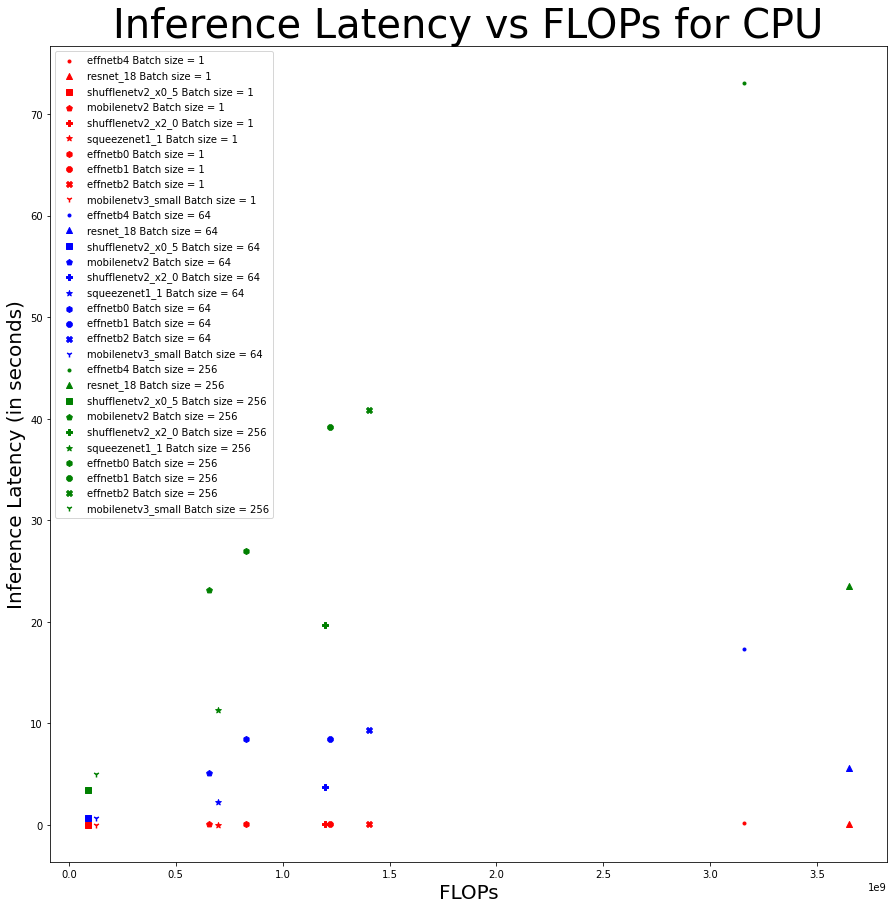

In [18]:
fig = plt.figure(figsize=(15, 15))
markers = ['.', '^', 's', 'p', 'P', '*', 'h', '8', 'X', '1']
plt.title('Inference Latency vs FLOPs for CPU', size=40)

for i in range(len(model_names)):
  plt.scatter(flops_models[i], inference_latency_cpu[:10][i], marker=markers[i], color='r', label=f'{model_names[i]} Batch size = 1')

for i in range(len(model_names)):
  plt.scatter(flops_models[i], inference_latency_cpu[10:20][i], marker=markers[i],color='b', label=f'{model_names[i]} Batch size = 64')

for i in range(len(model_names)):
  plt.scatter(flops_models[i], inference_latency_cpu[20:30][i], marker=markers[i], color='g', label=f'{model_names[i]} Batch size = 256')

plt.ylabel('Inference Latency (in seconds)', size=20)
plt.xlabel('FLOPs', size=20)
plt.legend()
fig.savefig('flops_vs_inference_latency_cpu.png')
plt.show()

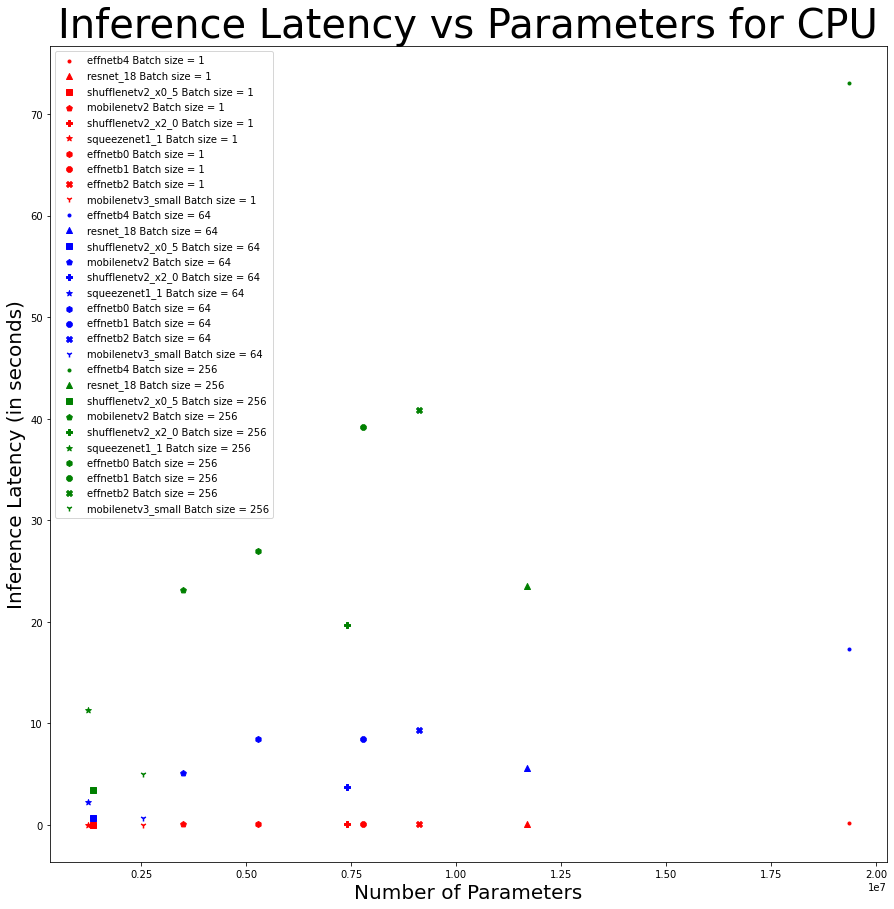

In [19]:
fig = plt.figure(figsize=(15, 15))
markers = ['.', '^', 's', 'p', 'P', '*', 'h', '8', 'X', '1']
plt.title('Inference Latency vs Parameters for CPU', size=40)

for i in range(len(model_names)):
  plt.scatter(params_models[i], inference_latency_cpu[:10][i], marker=markers[i], color='r', label=f'{model_names[i]} Batch size = 1')

for i in range(len(model_names)):
  plt.scatter(params_models[i], inference_latency_cpu[10:20][i], marker=markers[i],color='b', label=f'{model_names[i]} Batch size = 64')

for i in range(len(model_names)):
  plt.scatter(params_models[i], inference_latency_cpu[20:30][i], marker=markers[i], color='g', label=f'{model_names[i]} Batch size = 256')
  
plt.ylabel('Inference Latency (in seconds)', size=20)
plt.xlabel('Number of Parameters', size=20)
plt.legend()
fig.savefig('inference_latency_vs_params_cpu.png')
plt.show()

In [20]:
throughput_cpu = []
for bs_idx in range(len(batch_sizes)):
  for m_idx in range(len(models)):
    throughput_cpu.append(batch_sizes[bs_idx]/inference_latency_cpu[bs_idx*10:(bs_idx+1)*10][m_idx])
print(throughput_cpu)

[5.289973993476928, 11.641918973231634, 64.35844163815194, 22.154574265793364, 19.860898552920677, 37.17992039783354, 15.384883998165979, 9.70063879881769, 9.705891609200721, 70.4427798864667, 3.697399504002347, 11.478593305451676, 95.04488401027936, 12.601600173056642, 17.37277761853397, 28.937410310188763, 7.595395240568495, 7.548401343629185, 6.819659630117391, 90.77536268150983, 3.5057874714886297, 10.903503014761572, 73.85004876719516, 11.076934478703786, 13.014293954844426, 22.681990140890296, 9.490614817536844, 6.537561905017973, 6.260063213506522, 51.20744981429021]


In [21]:
len(throughput_cpu)

30

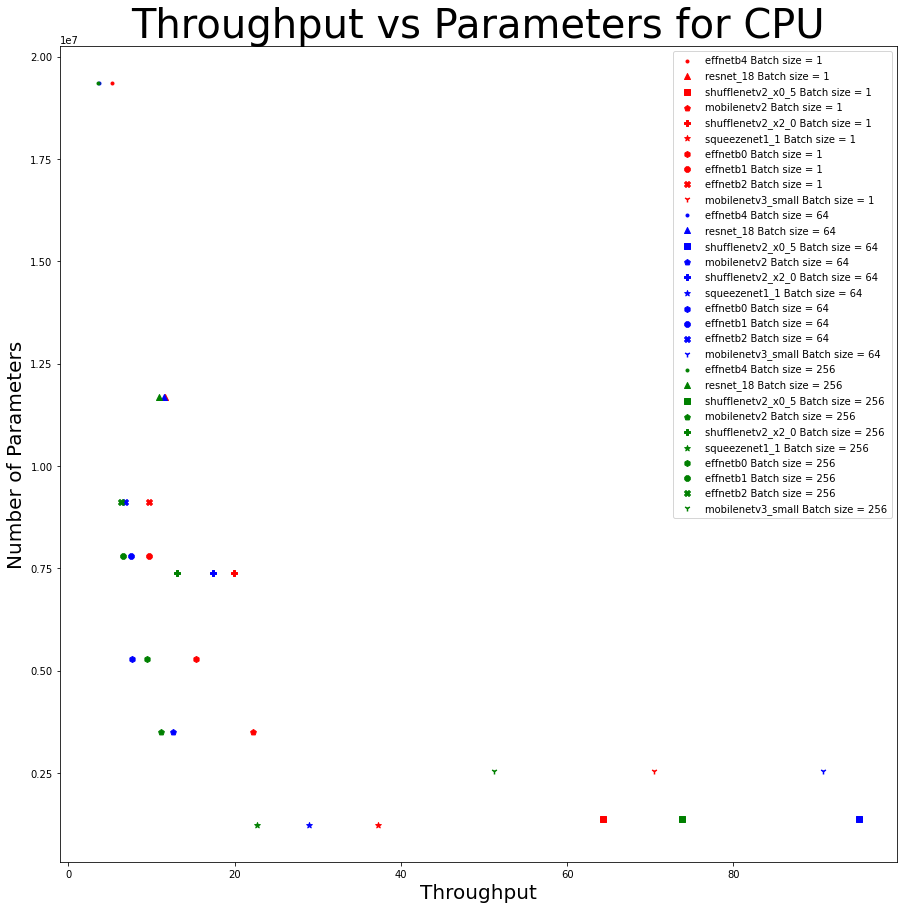

In [22]:
fig = plt.figure(figsize=(15, 15))
markers = ['.', '^', 's', 'p', 'P', '*', 'h', '8', 'X', '1']
plt.title('Throughput vs Parameters for CPU', size=40)

for i in range(len(model_names)):
  plt.scatter(throughput_cpu[:10][i], params_models[i], marker=markers[i], color='r', label=f'{model_names[i]} Batch size = 1')

for i in range(len(model_names)):
  plt.scatter(throughput_cpu[10:20][i], params_models[i], marker=markers[i],color='b', label=f'{model_names[i]} Batch size = 64')

for i in range(len(model_names)):
  plt.scatter(throughput_cpu[20:30][i], params_models[i], marker=markers[i], color='g', label=f'{model_names[i]} Batch size = 256')
  
plt.ylabel('Number of Parameters', size=20)
plt.xlabel('Throughput', size=20)
plt.legend()
fig.savefig('throughput_vs_params_cpu.png')
plt.show()

In [26]:
batch_sizes = [1, 64, 256]
inference_latency_gpu = []
device = torch.device('cuda')
for bs in batch_sizes:
  input = torch.randn(bs, 3, 224, 224).to(device)
  #input = input.to(device)
  for m in models:
    m.to(device)
    m.eval()
    with torch.no_grad():
      start = time.time()
      m(input)
      end = time.time()
    t = end - start
    inference_latency_gpu.append(t)
    torch.cuda.empty_cache()

In [27]:
inference_latency_gpu

[0.02348494529724121,
 0.0041656494140625,
 0.007598876953125,
 0.0062253475189208984,
 0.00852346420288086,
 0.003796815872192383,
 0.011329412460327148,
 0.015807628631591797,
 0.01470804214477539,
 0.0064237117767333984,
 0.02597808837890625,
 0.006415843963623047,
 0.010117530822753906,
 0.008846521377563477,
 0.013833284378051758,
 0.005126476287841797,
 0.014432668685913086,
 0.02492070198059082,
 0.020804643630981445,
 0.009318828582763672,
 0.02996993064880371,
 0.012174129486083984,
 0.015665054321289062,
 0.023291826248168945,
 0.018422842025756836,
 0.010439395904541016,
 0.027333974838256836,
 0.0339360237121582,
 0.026583433151245117,
 0.011261701583862305]

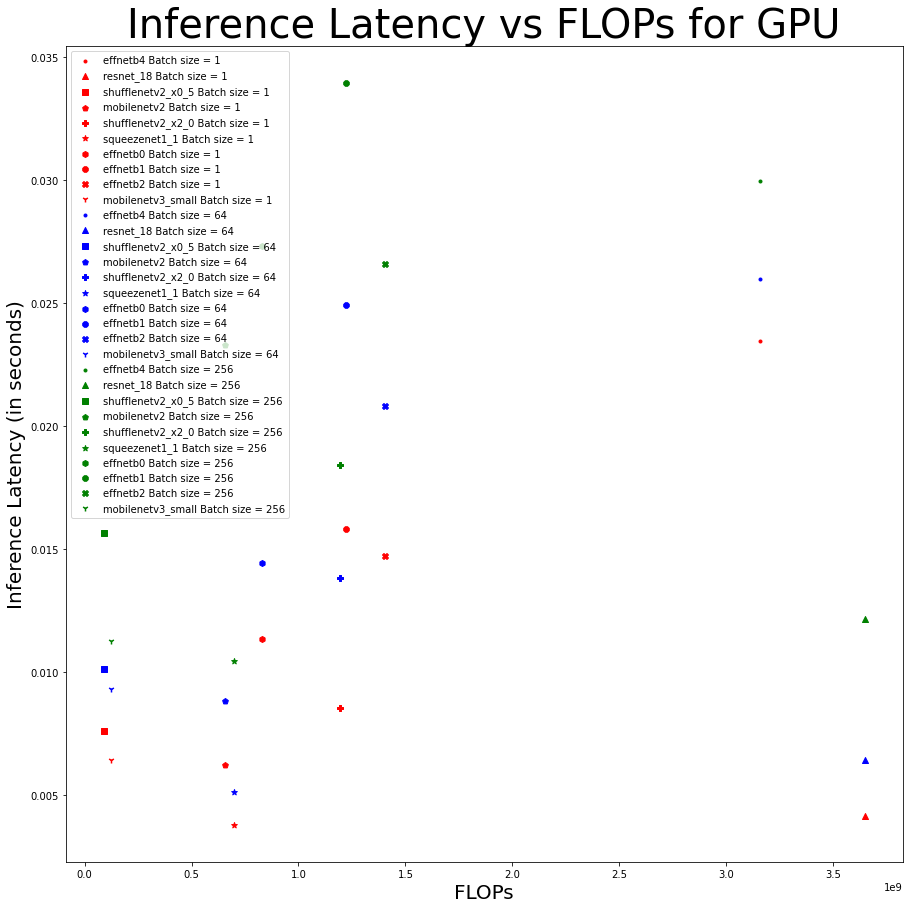

In [28]:
fig = plt.figure(figsize=(15, 15))
markers = ['.', '^', 's', 'p', 'P', '*', 'h', '8', 'X', '1']
plt.title('Inference Latency vs FLOPs for GPU', size=40)

for i in range(len(model_names)):
  plt.scatter(flops_models[i], inference_latency_gpu[:10][i], marker=markers[i], color='r', label=f'{model_names[i]} Batch size = 1')

for i in range(len(model_names)):
  plt.scatter(flops_models[i], inference_latency_gpu[10:20][i], marker=markers[i],color='b', label=f'{model_names[i]} Batch size = 64')

for i in range(len(model_names)):
  plt.scatter(flops_models[i], inference_latency_gpu[20:30][i], marker=markers[i], color='g', label=f'{model_names[i]} Batch size = 256')

plt.ylabel('Inference Latency (in seconds)', size=20)
plt.xlabel('FLOPs', size=20)
plt.legend()
fig.savefig('flops_vs_inference_latency_gpu.png')
plt.show()

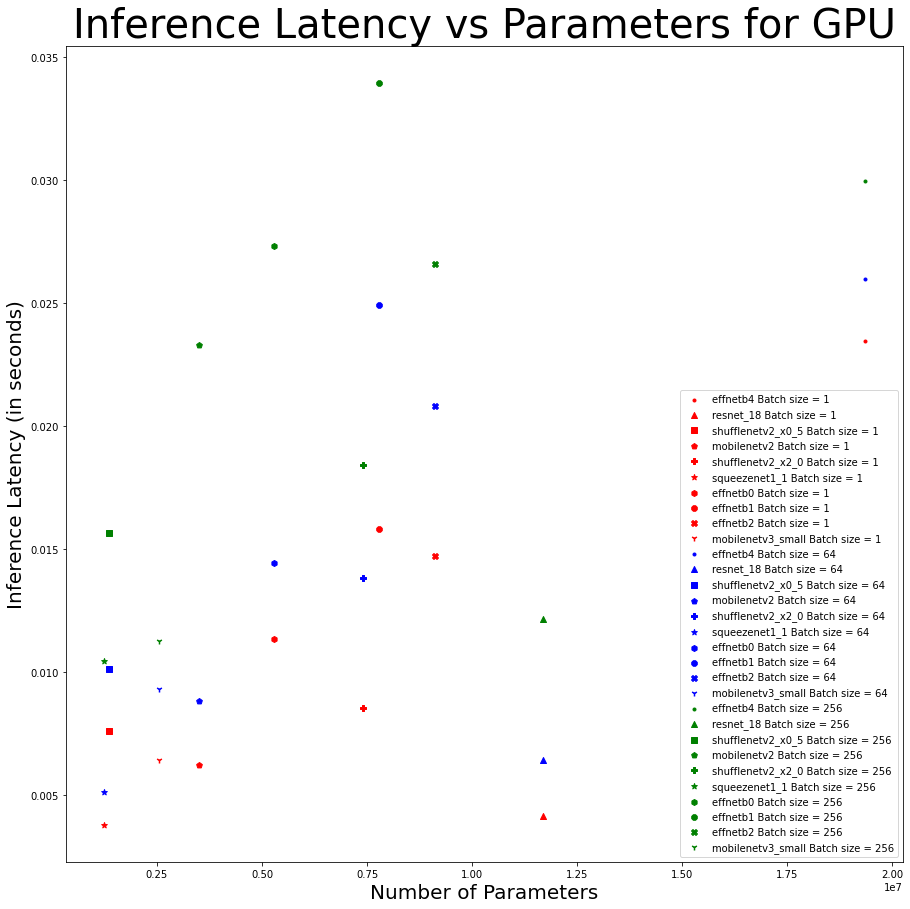

In [29]:
fig = plt.figure(figsize=(15, 15))
markers = ['.', '^', 's', 'p', 'P', '*', 'h', '8', 'X', '1']
plt.title('Inference Latency vs Parameters for GPU', size=40)

for i in range(len(model_names)):
  plt.scatter(params_models[i], inference_latency_gpu[:10][i], marker=markers[i], color='r', label=f'{model_names[i]} Batch size = 1')

for i in range(len(model_names)):
  plt.scatter(params_models[i], inference_latency_gpu[10:20][i], marker=markers[i],color='b', label=f'{model_names[i]} Batch size = 64')

for i in range(len(model_names)):
  plt.scatter(params_models[i], inference_latency_gpu[20:30][i], marker=markers[i], color='g', label=f'{model_names[i]} Batch size = 256')
  
plt.ylabel('Inference Latency (in seconds)', size=20)
plt.xlabel('Number of Parameters', size=20)
plt.legend()
fig.savefig('inference_latency_vs_params_gpu.png')
plt.show()

In [30]:
throughput_gpu = []
for bs_idx in range(len(batch_sizes)):
  for m_idx in range(len(models)):
    throughput_gpu.append(batch_sizes[bs_idx]/inference_latency_gpu[bs_idx*10:(bs_idx+1)*10][m_idx])
print(throughput_gpu)

[42.580469630366586, 240.05860805860806, 131.59839357429718, 160.6336026961817, 117.32318881118881, 263.37858712715854, 88.2658305099013, 63.260595457150615, 67.9900145890744, 155.67323609100694, 2463.614684287812, 9975.304942400595, 6325.654067301348, 7234.482037461258, 4626.522397063132, 12484.20872476979, 4434.384339638226, 2568.145955513035, 3076.2363025864934, 6867.815995497109, 8541.894974662498, 21028.197563746035, 16342.107390722025, 10990.980152109158, 13895.79304007972, 24522.491755355593, 9365.633849991713, 7543.606233050907, 9630.05788392721, 22731.911167566424]


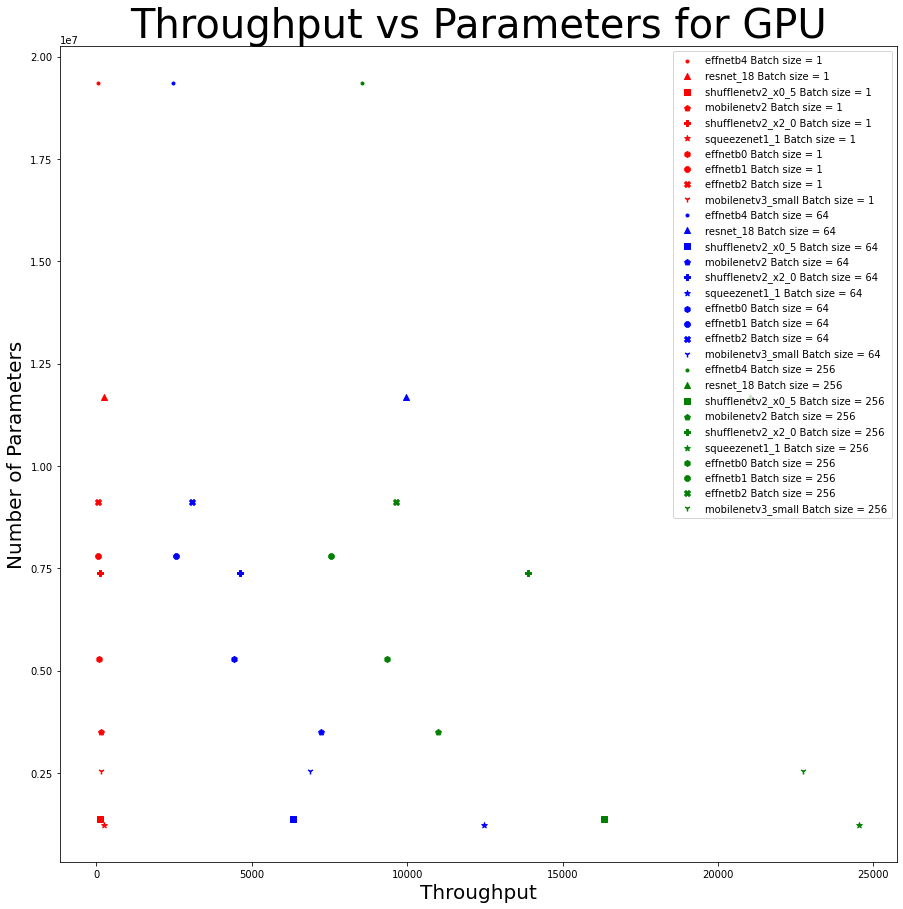

In [31]:
fig = plt.figure(figsize=(15, 15))
markers = ['.', '^', 's', 'p', 'P', '*', 'h', '8', 'X', '1']
plt.title('Throughput vs Parameters for GPU', size=40)

for i in range(len(model_names)):
  plt.scatter(throughput_gpu[:10][i], params_models[i], marker=markers[i], color='r', label=f'{model_names[i]} Batch size = 1')

for i in range(len(model_names)):
  plt.scatter(throughput_gpu[10:20][i], params_models[i], marker=markers[i],color='b', label=f'{model_names[i]} Batch size = 64')

for i in range(len(model_names)):
  plt.scatter(throughput_gpu[20:30][i], params_models[i], marker=markers[i], color='g', label=f'{model_names[i]} Batch size = 256')
  
plt.ylabel('Number of Parameters', size=20)
plt.xlabel('Throughput', size=20)
plt.legend()
fig.savefig('throughput_vs_params_gpu.png')
plt.show()

In [32]:
inference_latency_gpu

[0.02348494529724121,
 0.0041656494140625,
 0.007598876953125,
 0.0062253475189208984,
 0.00852346420288086,
 0.003796815872192383,
 0.011329412460327148,
 0.015807628631591797,
 0.01470804214477539,
 0.0064237117767333984,
 0.02597808837890625,
 0.006415843963623047,
 0.010117530822753906,
 0.008846521377563477,
 0.013833284378051758,
 0.005126476287841797,
 0.014432668685913086,
 0.02492070198059082,
 0.020804643630981445,
 0.009318828582763672,
 0.02996993064880371,
 0.012174129486083984,
 0.015665054321289062,
 0.023291826248168945,
 0.018422842025756836,
 0.010439395904541016,
 0.027333974838256836,
 0.0339360237121582,
 0.026583433151245117,
 0.011261701583862305]

In [33]:
model_performances_gpu = []

for bs_idx in range(len(batch_sizes)):
  for m_idx in range(len(models)):
    #temp = batch_sizes[bs_idx] * 256 / inference_latency_gpu[bs_idx*10:((bs_idx+1)*10)][m_idx]
    temp = flops_models[m_idx] / (inference_latency_gpu[bs_idx*10:((bs_idx+1)*10)][m_idx]**2 * batch_sizes[bs_idx]*3*224*224)
    model_performances_gpu.append(temp)

len(model_performances_gpu)

30

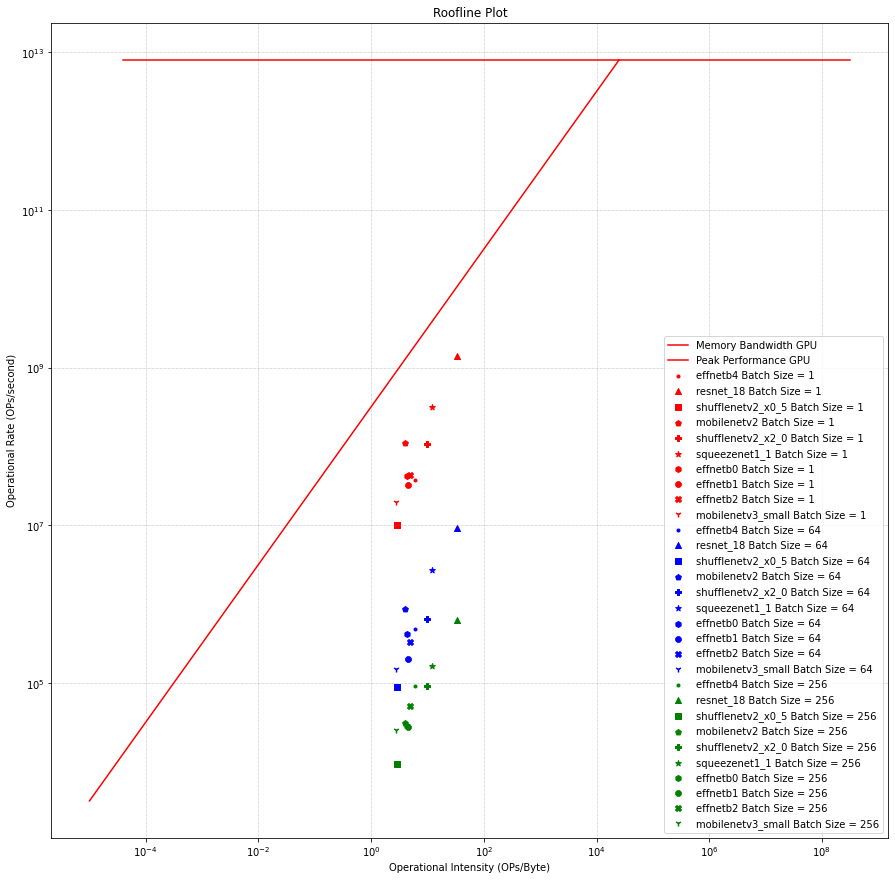

In [35]:
import numpy as np
import matplotlib.pyplot as plt
peak_performance_t4_gpu = 8.1*10**12  # Peak performance of T4 GPU
mem_bandwidth_gpu = 320*10**6 # GPU

ops_per_byte_gpu = np.logspace(-5, 4.4, num=1000)
ops_per_sec_gpu = np.zeros_like(ops_per_byte_gpu)

for i, ops in enumerate(ops_per_byte_gpu):
  ops_per_sec_gpu[i] = (mem_bandwidth_gpu*ops)


fig = plt.figure(figsize=(15,15))
plt.plot(ops_per_byte_gpu, ops_per_sec_gpu, 'r-', linewidth=1.5, label='Memory Bandwidth GPU')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Operational Intensity (OPs/Byte)')
plt.ylabel('Operational Rate (OPs/second)')
plt.title('Roofline Plot')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='gray')

for i in range(len(model_names)):
  plt.scatter(op_intensity[i], model_performances_gpu[:10][i], marker=markers[i], color='r', label=f'{model_names[i]} Batch Size = 1')

for i in range(len(model_names)):
  plt.scatter(op_intensity[i], model_performances_gpu[10:20][i], marker=markers[i], color='b', label= f'{model_names[i]} Batch Size = 64')

for i in range(len(model_names)):
  plt.scatter(op_intensity[i], model_performances_gpu[20:30][i], marker=markers[i], color='g', label=f'{model_names[i]} Batch Size = 256')


plt.plot([1/ops_per_byte_gpu[-1], min(mem_bandwidth_gpu, peak_performance_t4_gpu/ops_per_byte_gpu[-1])], [peak_performance_t4_gpu, peak_performance_t4_gpu], 'r-', linewidth=1.5, label='Peak Performance GPU')
plt.legend(loc='best')
fig.savefig('Roofline_Plot_GPU.png')
plt.show()

In [23]:
model_performances_cpu = []

for bs_idx in range(len(batch_sizes)):
  for m_idx in range(len(models)):
    temp = flops_models[m_idx] / (inference_latency_cpu[bs_idx*10:((bs_idx+1)*10)][m_idx]**2 * batch_sizes[bs_idx] * 3 * 224 * 224)
    model_performances_cpu.append(temp)

model_performances_cpu

[586940.8538216689,
 3284692.5743267355,
 2452937.535692641,
 2135665.418209763,
 3135293.963666367,
 6415868.793740483,
 1305572.4980748286,
 763450.2546763624,
 878567.5032044211,
 4119195.5174547266,
 1.0938054950673703,
 12.181001585454085,
 20.4076509623554,
 2.635832860684533,
 9.151221748818774,
 14.825794133203209,
 1.2138733458271862,
 1.7633970943052135,
 1.6545874977801243,
 26.09368992808809,
 0.01536521137019067,
 0.1717345925823791,
 0.19251169890545625,
 0.03182186840743524,
 0.08024201170339212,
 0.14232493083454972,
 0.02961292729725642,
 0.020667683816492356,
 0.021784209390649387,
 0.1297435670760561]

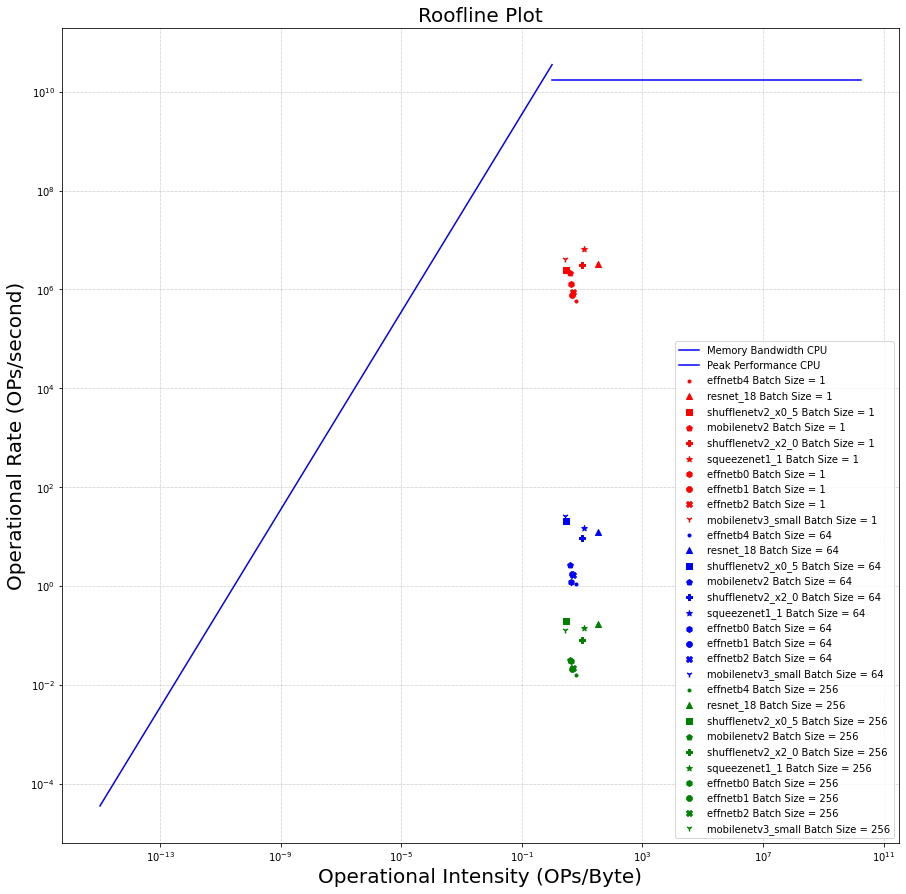

In [24]:
import numpy as np
import matplotlib.pyplot as plt
peak_performance_cpu = cpu_peak_performance  # Peak performance of 2x Intel Xeon processor CPU
mem_bandwidth = cpu_memory_bandwidth  # CPU
mem_bandwidth_gpu = 320*10**6 # GPU

ops_per_byte = np.logspace(-15, 0.0, num=1000)
ops_per_sec_cpu = np.zeros_like(ops_per_byte)


for i, ops in enumerate(ops_per_byte):
  ops_per_sec_cpu[i] = (mem_bandwidth*ops)

fig = plt.figure(figsize=(15,15))
plt.plot(ops_per_byte, ops_per_sec_cpu, 'b-', linewidth=1.5, label='Memory Bandwidth CPU')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Operational Intensity (OPs/Byte)', size=20)
plt.ylabel('Operational Rate (OPs/second)', size=20)
plt.title('Roofline Plot', size=20)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='gray')

for i in range(len(model_names)):
  plt.scatter(op_intensity[i], model_performances_cpu[:10][i], marker=markers[i], color='r', label=f'{model_names[i]} Batch Size = 1')


for i in range(len(model_names)):
  plt.scatter(op_intensity[i], model_performances_cpu[10:20][i], marker=markers[i], color='b', label=f'{model_names[i]} Batch Size = 64')

for i in range(len(model_names)):
  plt.scatter(op_intensity[i], model_performances_cpu[20:30][i], marker=markers[i], color='g', label=f'{model_names[i]} Batch Size = 256')

plt.plot([1/ops_per_byte[-1], min(mem_bandwidth, peak_performance_cpu/ops_per_byte[-1])], [peak_performance_cpu, peak_performance_cpu], 'b-', linewidth=1.5, label='Peak Performance CPU')

plt.legend(loc='best')
fig.savefig('Roofline_Plot_CPU.png')
plt.show()

In [38]:
flops_every_bs = []
params_every_bs = []
for bs in batch_sizes:
  flops_every_bs.extend(flops_models)
  params_every_bs.extend(params_models)

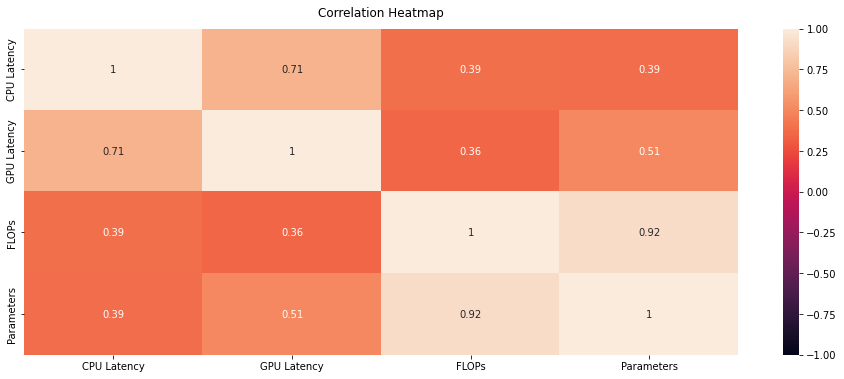

In [39]:
#Q3.3 Calculating Correlation
import pandas as pd
import seaborn as sns
data = {'CPU Latency': inference_latency_cpu,
        'GPU Latency': inference_latency_gpu,
        'FLOPs': flops_every_bs,
        'Parameters': params_every_bs}
df = pd.DataFrame(data, columns=['CPU Latency','GPU Latency', 'FLOPs', 'Parameters'])
fig = plt.figure(figsize=(16, 6))
corr = df.corr(method = 'spearman')
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
fig.savefig('spearman_correlation_coefficients.png')

In [40]:
models = [effnetb4, resnet18, shufflenetv2_x0_5, mobilenetv2, shufflenetv2_x2_0, squeezenet, effnetb0, effnetb1, effnetb2, mobilenetv3]

In [41]:
latency_ratio_forward_to_backward_cpu = []
input_tensor = torch.randn(1,3,224,224)
loss_function = nn.CrossEntropyLoss()
target = torch.tensor([0])
for m in models:
  m.to(torch.device('cpu'))
  start_forward = time.time()
  output = m(input_tensor)
  end_forward = time.time()
  forward_latency = end_forward - start_forward

  loss = loss_function(output, target)
  m.zero_grad()

  start_backward = time.time()
  loss.backward()
  end_backward = time.time()
  backward_latency = end_backward - start_backward

  latency_ratio_forward_to_backward_cpu.append(forward_latency/backward_latency)

latency_ratio_forward_to_backward_cpu

[0.6274417687956854,
 0.5384974063064638,
 0.8479107154719989,
 0.4873393402624349,
 0.5233588636179975,
 0.8208010946459681,
 0.604731946660245,
 0.5915093138836512,
 0.5628127629422967,
 0.49895803446036757]

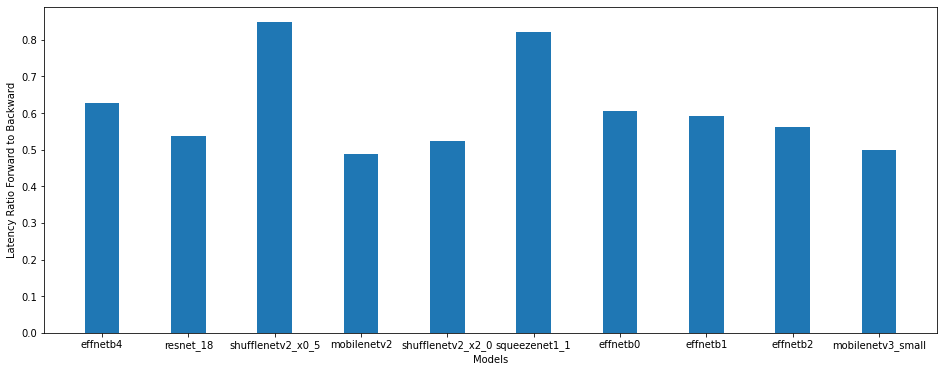

In [42]:
fig = plt.figure(figsize=(16,6))
plt.bar(model_names, latency_ratio_forward_to_backward_cpu, width=0.4, align='center')
plt.xlabel('Models')
plt.ylabel('Latency Ratio Forward to Backward')
fig.savefig('latency_ratio_forward_to_backward.png')
plt.show()